In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
n = 100

In [3]:
x = torch.ones(n, 2)

In [4]:
x[:, 0].uniform_(-1, 1)

tensor([-0.2942,  0.6153, -0.3597,  0.0717,  0.6761,  0.8869,  0.5444,  0.3572,
        -0.1443, -0.0780,  0.7459, -0.7822,  0.5966,  0.5538,  0.2431,  0.0181,
         0.2206,  0.8004,  0.8439,  0.5134,  0.2426,  0.6897, -0.7710, -0.1905,
        -0.9777, -0.3180,  0.7113, -0.4172,  0.9126,  0.4490,  0.3656, -0.5231,
         0.6711,  0.8320, -0.7692,  0.9785, -0.0195, -0.2122,  0.7159, -0.7306,
        -0.7264,  0.0185, -0.9129,  0.5104, -0.6533,  0.3224, -0.8873, -0.5085,
        -0.5464, -0.7455,  0.4190,  0.2242,  0.0232, -0.5869, -0.4532, -0.9106,
         0.2563,  0.1944, -0.9067, -0.1317,  0.8822, -0.9428,  0.4487,  0.4005,
        -0.7670, -0.7068, -0.6211, -0.2918, -0.9522,  0.9191, -0.4730,  0.1865,
         0.3788, -0.0852,  0.7692, -0.0546,  0.7538,  0.8759, -0.6100, -0.4085,
        -0.6845, -0.5986, -0.2080, -0.6736, -0.0328,  0.6418,  0.8230,  0.3213,
        -0.2618,  0.4929,  0.3468,  0.1559, -0.1744, -0.6008, -0.0836,  0.9591,
        -0.1320,  0.5449,  0.8089,  0.74

In [6]:
x[:5]

tensor([[-0.2942,  1.0000],
        [ 0.6153,  1.0000],
        [-0.3597,  1.0000],
        [ 0.0717,  1.0000],
        [ 0.6761,  1.0000]])

In [7]:
a = tensor(3., 2)
a

tensor([3., 2.])

In [8]:
y = x@a + torch.rand(n)

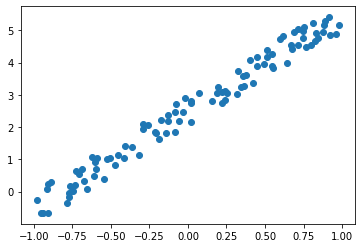

In [9]:
plt.scatter(x[:, 0], y)

In [10]:
def mse(y_hat, y):
    v = ((y_hat -y)**2).mean()
    return v

In [11]:
a = tensor(-1., 1)

In [12]:
y_hat = x@a

In [13]:
mse(y_hat, y)

tensor(8.2451)

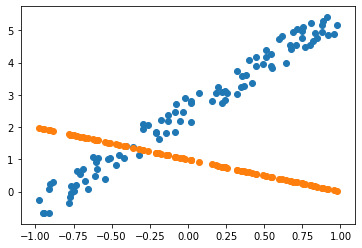

In [14]:
plt.scatter(x[:,0], y)
plt.scatter(x[:, 0], y_hat)

In [15]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [19]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [20]:
lr = 1e-1
for t in range(100):
    update()

tensor(8.2451, grad_fn=<MeanBackward0>)
tensor(1.1767, grad_fn=<MeanBackward0>)
tensor(0.3422, grad_fn=<MeanBackward0>)
tensor(0.1459, grad_fn=<MeanBackward0>)
tensor(0.0987, grad_fn=<MeanBackward0>)
tensor(0.0874, grad_fn=<MeanBackward0>)
tensor(0.0847, grad_fn=<MeanBackward0>)
tensor(0.0840, grad_fn=<MeanBackward0>)
tensor(0.0838, grad_fn=<MeanBackward0>)
tensor(0.0838, grad_fn=<MeanBackward0>)


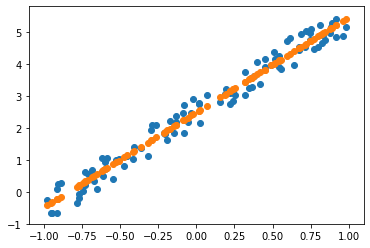

In [21]:
plt.scatter(x[:,0], y)
with torch.no_grad():
    plt.scatter(x[:,0], x@a)

In [23]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [25]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)